# Classificação de Pokémon

## 1. Importação das bibliotecas

In [37]:
import numpy as np  # Biblioteca para trabalhar com vetores e matrizes
import pandas as pd  # Biblioteca para manipulação de dados tabulares
import matplotlib.pyplot as plt  # Biblioteca para gráficos
from sklearn.preprocessing import LabelEncoder  # Para converter texto em números
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística
from sklearn.pipeline import make_pipeline  # Para criar modelos encadeados (ex: polinomiais)
from sklearn.preprocessing import PolynomialFeatures  # Para criar combinações polinomiais das features
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, ShuffleSplit  # Técnicas de validação
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

## 2. Definição dos dados (Pokémons com tipo, ataque e velocidade)

In [62]:
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}

## 3. Criando DataFrame

In [63]:
# Estrutura de tabela com os dados dos Pokémon
df = pd.DataFrame(data)

## 4. Codificação dos tipos: Fogo = 1, Água = 0

In [64]:
le = LabelEncoder()
le.fit(['Fogo', 'Água'])
df['TipoNum'] = le.fit_transform(df['Tipo'])  # Converte as categorias em números


## 5. Separação de features (X) e target (y)

In [65]:
X = df[['Attack', 'Speed']].values  # Usamos ataque e velocidade como entrada
y = df['TipoNum'].values  # A saída é o tipo do Pokémon

## 6. Separação padrão para treino/teste (Hold-Out)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7. Função para visualização do modelo

In [67]:
def plot_model(model, X_train, y_train, X_test, y_test, title):
    # Geração da grade para a região de decisão
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot da figura
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['red', 'blue'])  # 0 = Fogo (vermelho), 1 = Água (azul)
    plt.contourf(xx, yy, Z, alpha=0.1, cmap=cmap)

    # Treino com nomes
    for i in range(len(X_train)):
        color = 'red' if y_train[i] == 0 else 'blue'
        plt.scatter(X_train[i, 0], X_train[i, 1], color=color, edgecolor='k', marker='o', s=100)
        nome = df[(df['Attack'] == X_train[i, 0]) & (df['Speed'] == X_train[i, 1])]['Nome'].values
        if len(nome) > 0:
            plt.text(X_train[i, 0]+0.3, X_train[i, 1]+0.3, nome[0], fontsize=8)

    # Teste com nomes
    for i in range(len(X_test)):
        color = 'red' if y_test[i] == 0 else 'blue'
        plt.scatter(X_test[i, 0], X_test[i, 1], color=color, edgecolor='k', marker='s', s=100)
        nome = df[(df['Attack'] == X_test[i, 0]) & (df['Speed'] == X_test[i, 1])]['Nome'].values
        if len(nome) > 0:
            plt.text(X_test[i, 0]+0.3, X_test[i, 1]+0.3, nome[0], fontsize=8)

    # Legenda personalizada
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markeredgecolor='k', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia Treino: {model.score(X_train, y_train):.2f}')
    print(f'Acurácia Teste: {model.score(X_test, y_test):.2f}')

## 8. K-Fold

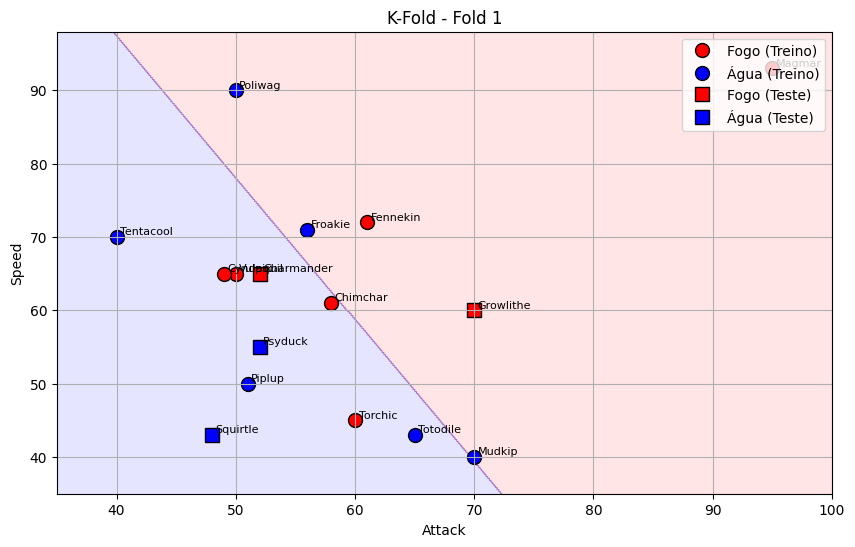

Acurácia Treino: 0.42
Acurácia Teste: 0.75


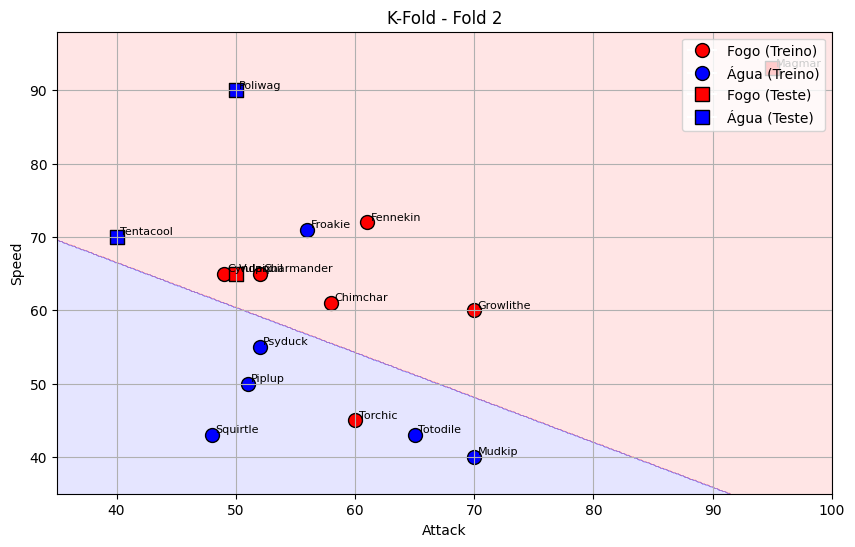

Acurácia Treino: 0.83
Acurácia Teste: 0.50


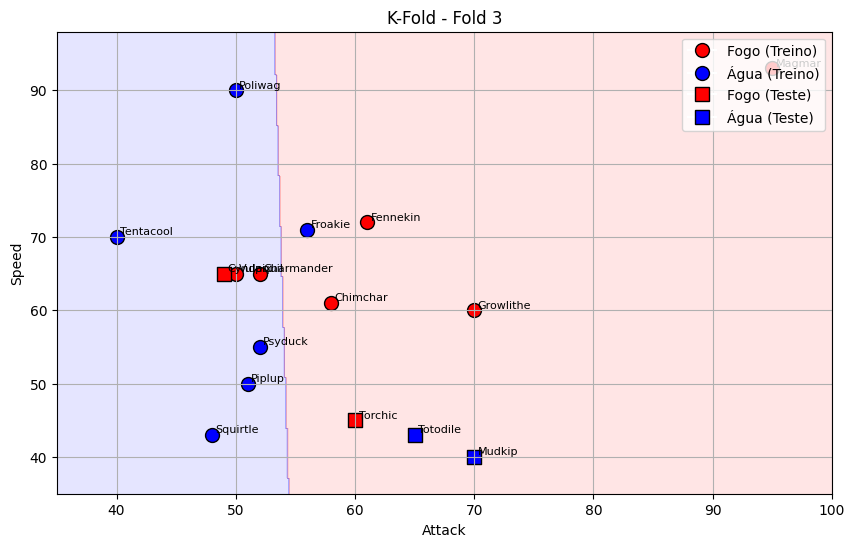

Acurácia Treino: 0.75
Acurácia Teste: 0.25


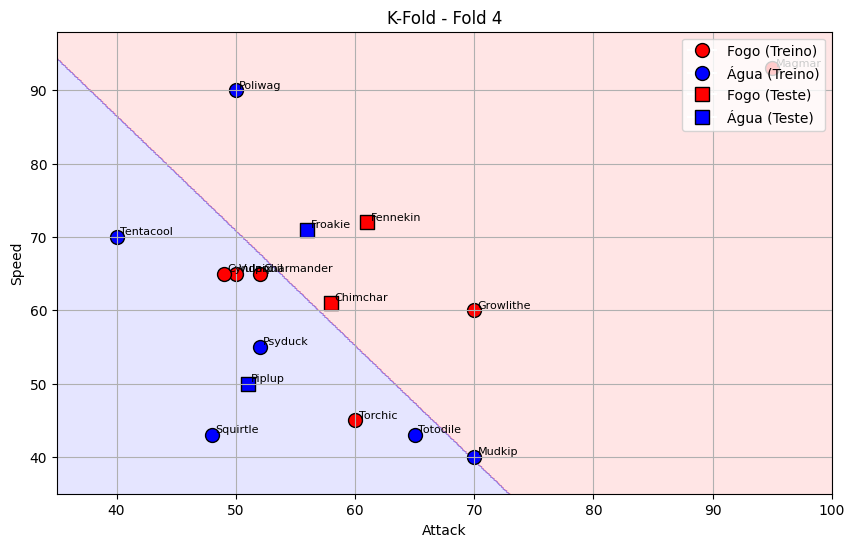

Acurácia Treino: 0.50
Acurácia Teste: 0.75


In [68]:
kf = KFold(n_splits=4)
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    model = LogisticRegression()
    model.fit(X[train_idx], y[train_idx])
    plot_model(model, X[train_idx], y[train_idx], X[test_idx], y[test_idx], f'K-Fold - Fold {fold+1}')


## 9. Leave-One-Out

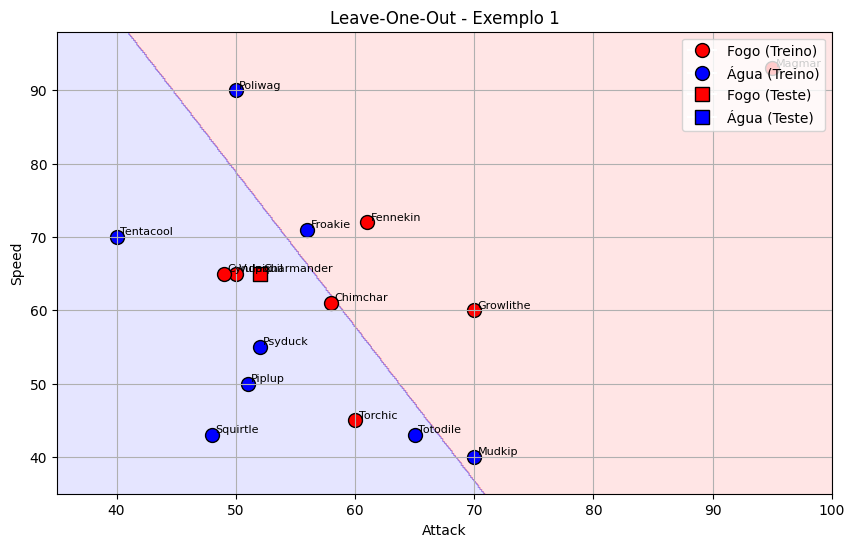

Acurácia Treino: 0.53
Acurácia Teste: 0.00


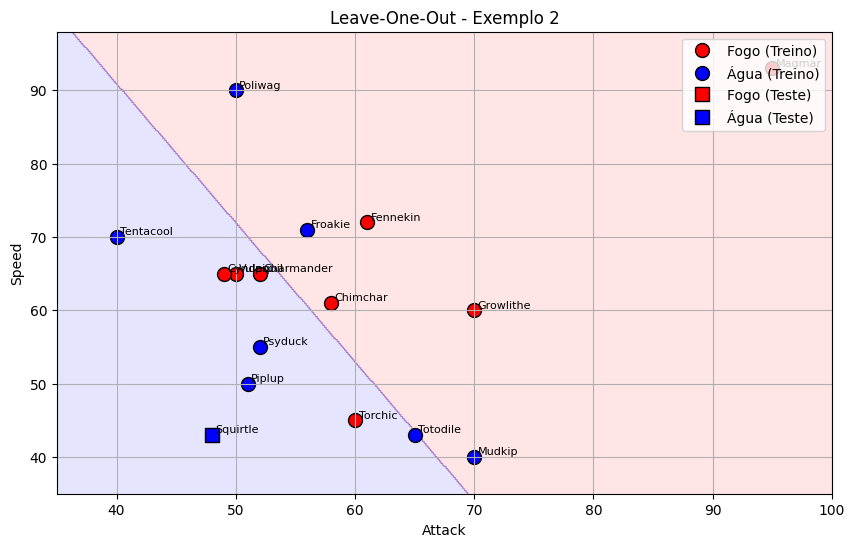

Acurácia Treino: 0.53
Acurácia Teste: 1.00


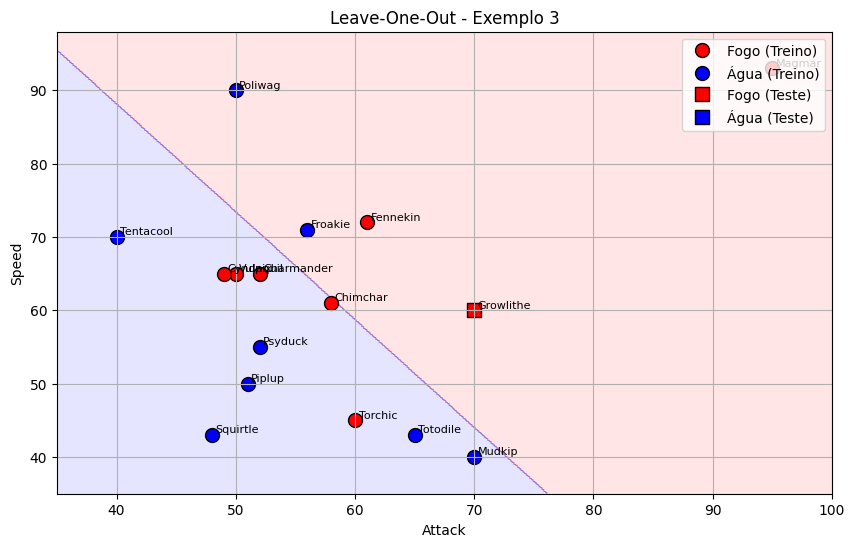

Acurácia Treino: 0.53
Acurácia Teste: 1.00


In [69]:
loo = LeaveOneOut()
for i, (train_idx, test_idx) in enumerate(loo.split(X)):
    if i >= 3: break  # Limita a 3 exemplos para não gerar muitas visualizações
    model = LogisticRegression()
    model.fit(X[train_idx], y[train_idx])
    plot_model(model, X[train_idx], y[train_idx], X[test_idx], y[test_idx], f'Leave-One-Out - Exemplo {i+1}')

## 10. Stratified K-Fold

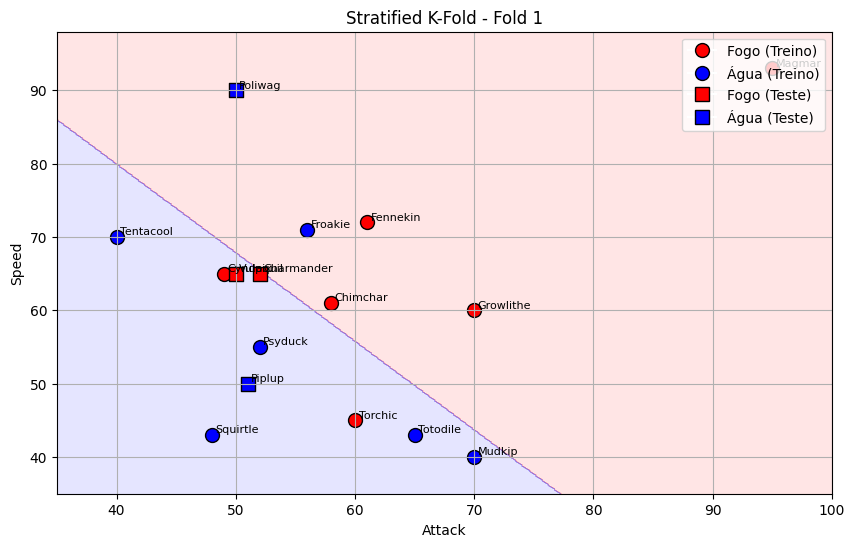

Acurácia Treino: 0.75
Acurácia Teste: 0.25


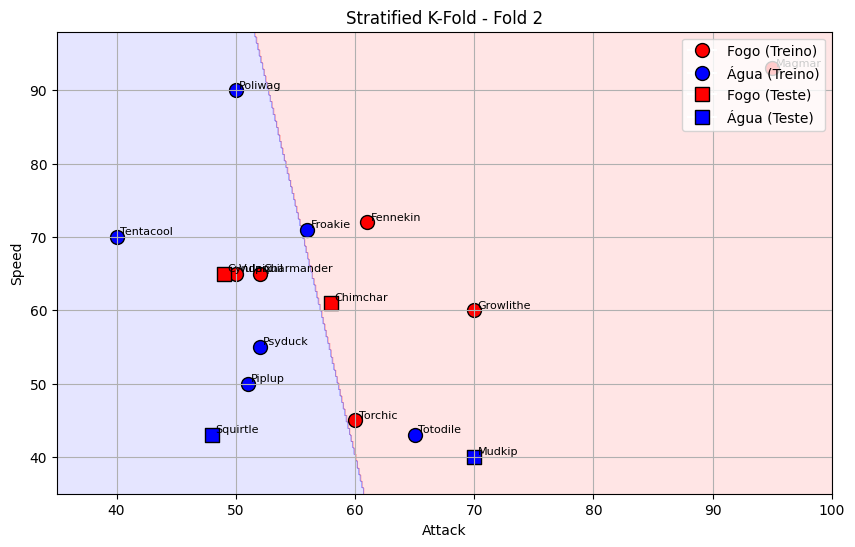

Acurácia Treino: 0.67
Acurácia Teste: 0.50


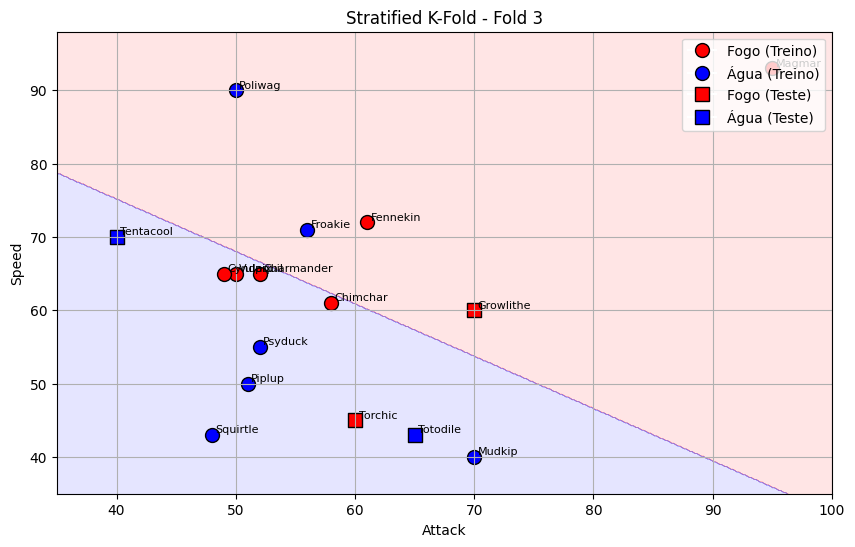

Acurácia Treino: 0.50
Acurácia Teste: 0.75


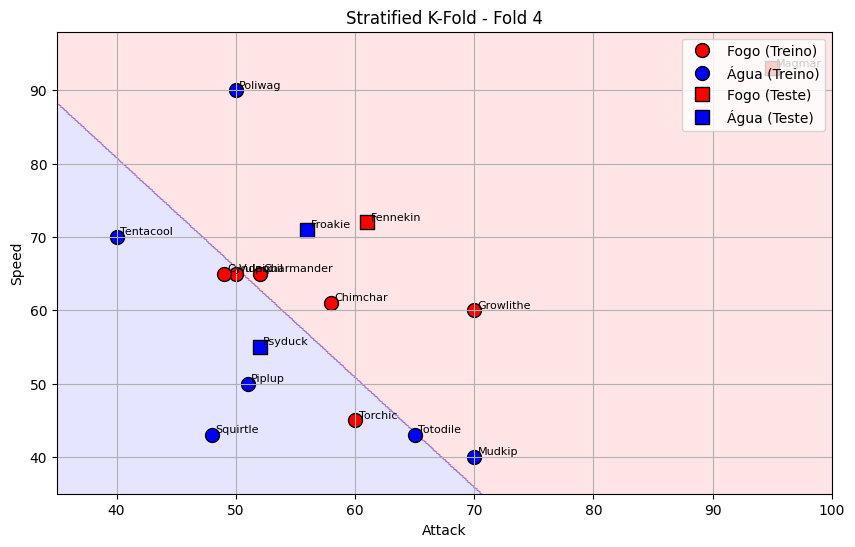

Acurácia Treino: 0.58
Acurácia Teste: 0.75


In [41]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    model = LogisticRegression()
    model.fit(X[train_idx], y[train_idx])
    plot_model(model, X[train_idx], y[train_idx], X[test_idx], y[test_idx], f'Stratified K-Fold - Fold {fold+1}')


## 11. ShuffleSplit (Subamostragem)

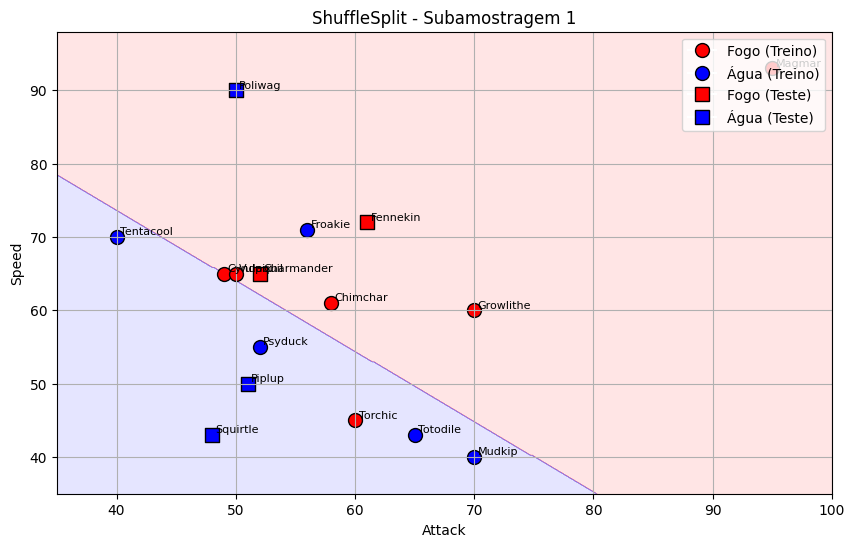

Acurácia Treino: 0.82
Acurácia Teste: 0.80


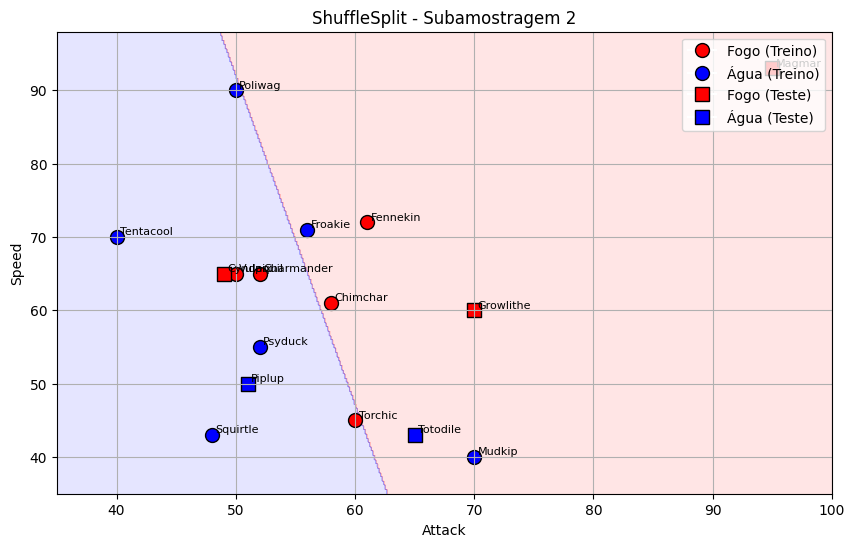

Acurácia Treino: 0.55
Acurácia Teste: 0.60


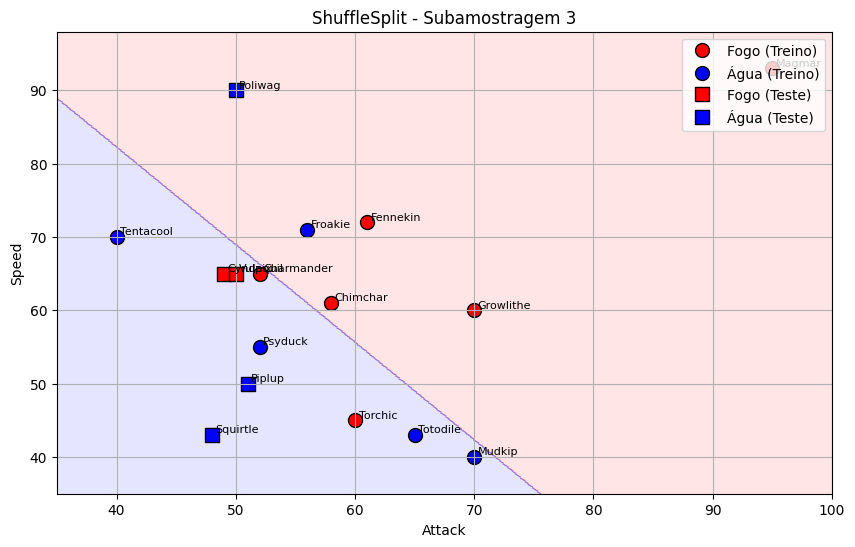

Acurácia Treino: 0.73
Acurácia Teste: 0.40


In [51]:
ss = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
for split, (train_idx, test_idx) in enumerate(ss.split(X)):
    model = LogisticRegression()
    model.fit(X[train_idx], y[train_idx])
    plot_model(model, X[train_idx], y[train_idx], X[test_idx], y[test_idx], f'ShuffleSplit - Subamostragem {split+1}')


## 12. Sub Ajuste (Modelo muito simples)

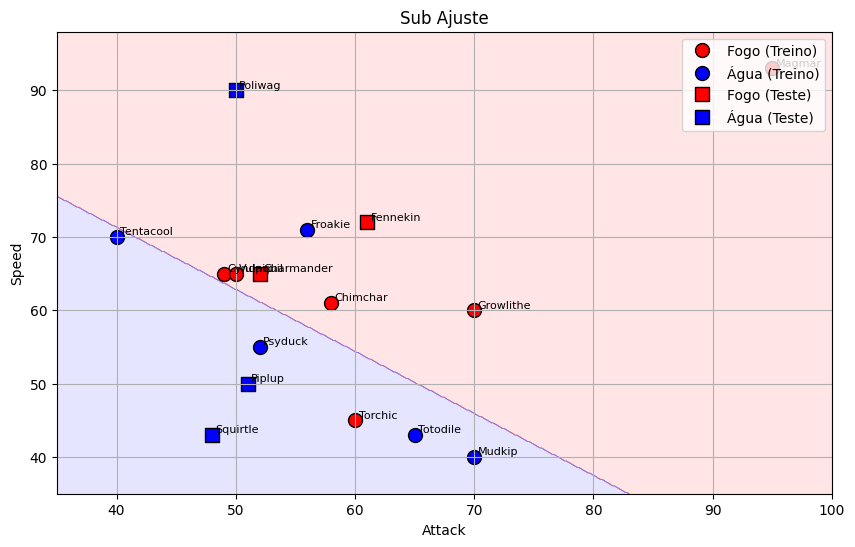

Acurácia Treino: 0.82
Acurácia Teste: 0.80


In [74]:
model_sub = LogisticRegression(C=0.01)  # Modelo pouco flexível, muito simples
model_sub.fit(X_train,y_train)  # Treina com os rótulos corretos
plot_model(model_sub, X_train, y_train, X_test, y_test, 'Sub Ajuste')



## 13. Super Ajuste (Modelo muito complexo)

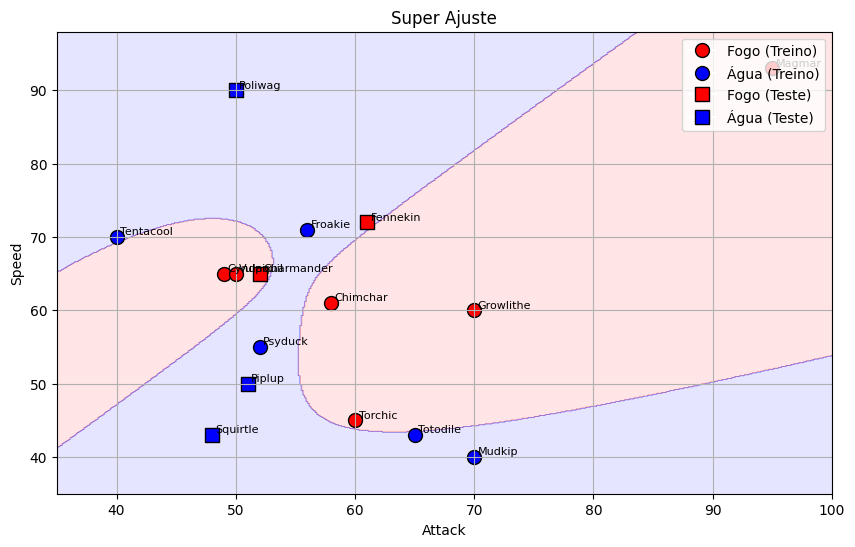

Acurácia Treino: 1.00
Acurácia Teste: 0.80


In [72]:
model_super = make_pipeline(PolynomialFeatures(degree=4), LogisticRegression(max_iter=1000))  # Modelo polinomial complexo
model_super.fit(X_train, y_train)
plot_model(model_super, X_train, y_train, X_test, y_test, 'Super Ajuste')